<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [48]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import requests
import ssl
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/valentine/Desktop/data_for_practic/books.csv', error_bad_lines=False)
df.head()
data = pd.read_csv('/Users/valentine/Desktop/data_for_practic/bestsellers with categories.csv')
data.drop_duplicates('Name',inplace=True)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [3]:
df.columns = ['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
           'language_code', 'num_pages', 'ratings_count', 'text_reviews_count',
           'publication_date', 'publisher']

In [4]:
miss_values = pd.DataFrame(df.isna().sum())
df.drop_duplicates(inplace=True)
miss_values.T

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,0,0,0,0,0,0,0,0,0,0,0,0


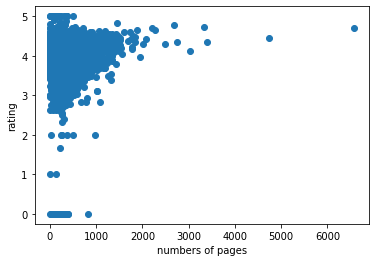

In [5]:
plt.scatter(df.num_pages, df.average_rating)
plt.xlabel('numbers of pages')
plt.ylabel('rating')
plt.show()

In [6]:
# alright it's complete collection
df[(df.num_pages > 6000)] 

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6497,24520,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.7,039306011X,9780393060119,eng,6576,1338,81,10/17/2004,W. W. Norton Company


In [165]:
top_books = data[data.Genre == 'Non Fiction'].sort_values(['Year','Reviews'], ascending=[True, False])

<AxesSubplot:title={'center':'Languages'}, xlabel='language_code', ylabel='count'>

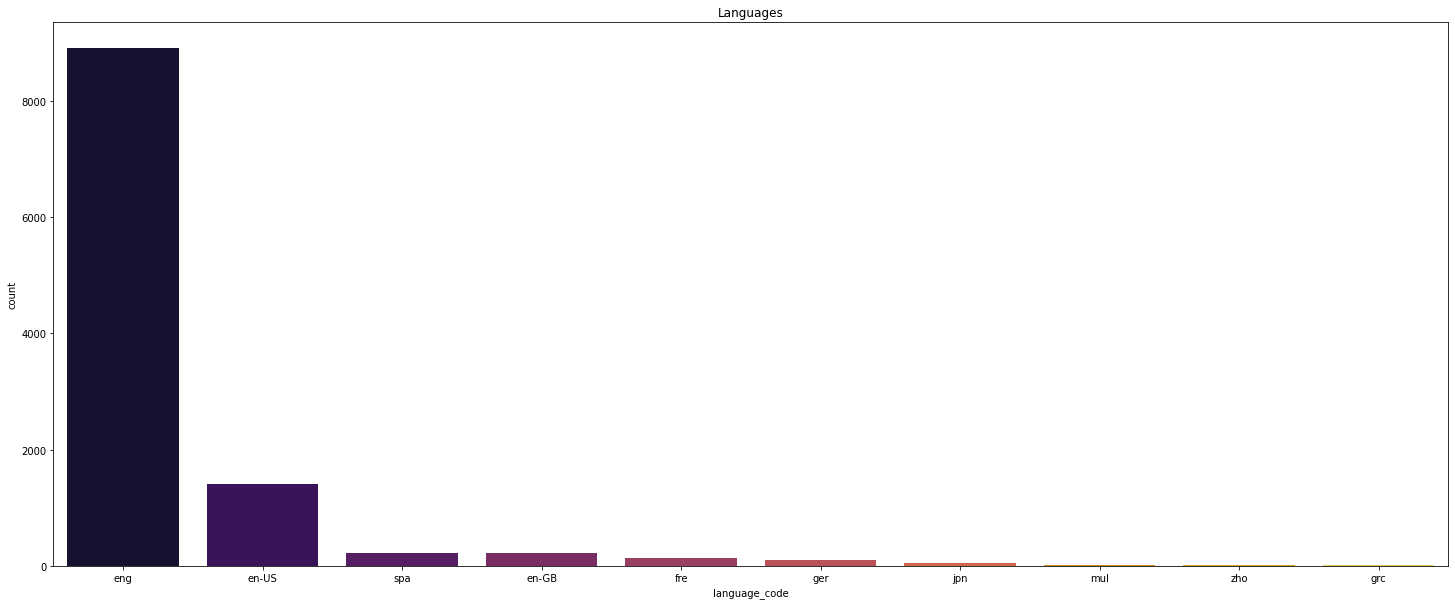

In [17]:
plt.figure(1, figsize=(25,10))
plt.title("Languages")
sns.countplot(x = "language_code", order=df['language_code'].value_counts().index[0:10] ,data=df,palette='inferno')

In [14]:
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


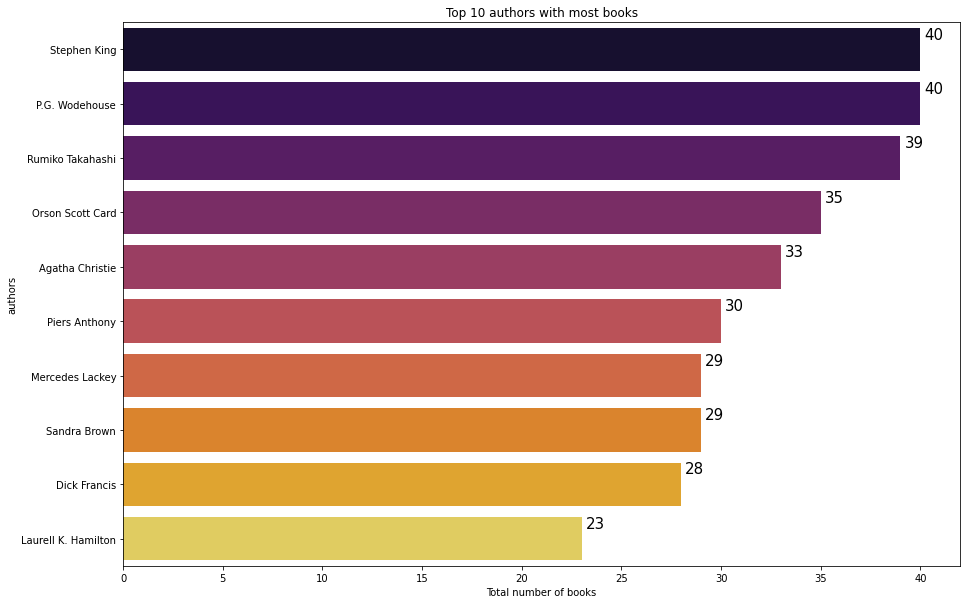

In [16]:
plt.figure(figsize=(15,10))
ax = sns.barplot(most_books['title'], most_books.index, palette='inferno')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

In [25]:
highly_rated_author =df[df['average_rating']>4.4]
highly_rated_author = highly_rated_author.drop_duplicates('authors')
highly_rated_author.sort_values(by='ratings_count',ascending=False)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2846,10572,A Clash of Kings (A Song of Ice and Fire #2),George R.R. Martin,4.41,0553381695,9780553381696,eng,969,638766,16535,5/28/2002,Bantam
4254,15241,The Two Towers (The Lord of the Rings #2),J.R.R. Tolkien/Peter S. Beagle,4.44,0618346260,9780618346264,eng,322,593467,5798,9/5/2003,Houghton Mifflin
3787,13615,Death Note Vol. 1: Boredom (Death Note #1),Tsugumi Ohba/Takeshi Obata/Pookie Rolf,4.43,1421501686,9781421501680,eng,195,174482,3010,10/10/2005,VIZ Media LLC
10528,42900,Lover Awakened (Black Dagger Brotherhood #3),J.R. Ward,4.45,0451219368,9780451219367,eng,448,144906,5728,9/5/2006,Signet
...,...,...,...,...,...,...,...,...,...,...,...,...
10262,41639,Bill Gates: Computer Legend (Famous Lives),Sara Barton-Wood,5.00,0739844326,9780739844328,eng,48,0,0,11/1/2001,Raintree
6813,25685,An Odyssey in Learning and Perception,Eleanor J. Gibson,4.50,026257103X,9780262571036,eng,654,0,0,2/3/1994,Bradford Book
6973,26410,Wissenschaft der Logik: Die Lehre Vom Begriff ...,Georg Wilhelm Friedrich Hegel,4.78,3787307672,9783787307678,ger,337,0,0,1/1/1994,F. Meiner
624,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5.00,0198145047,9780198145042,grc,364,0,0,2/22/1922,Oxford University Press USA


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 37057 missing from c

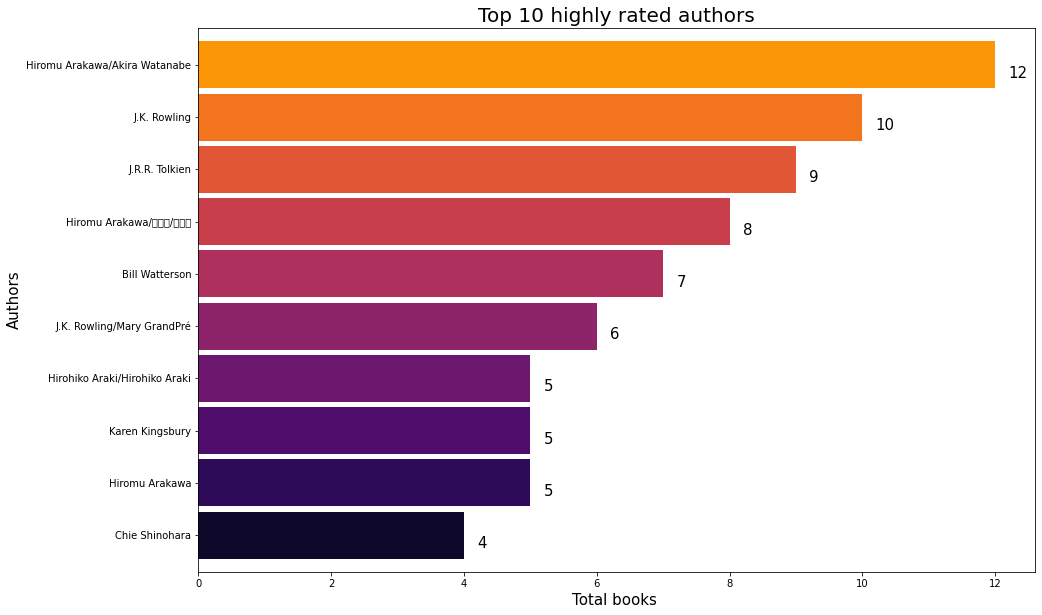

In [26]:
highly_rated_author =df[df['average_rating']>4.4]
highly_rated_author = highly_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.subplots(figsize=(15,10))
ax = highly_rated_author['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('inferno',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 highly rated authors",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

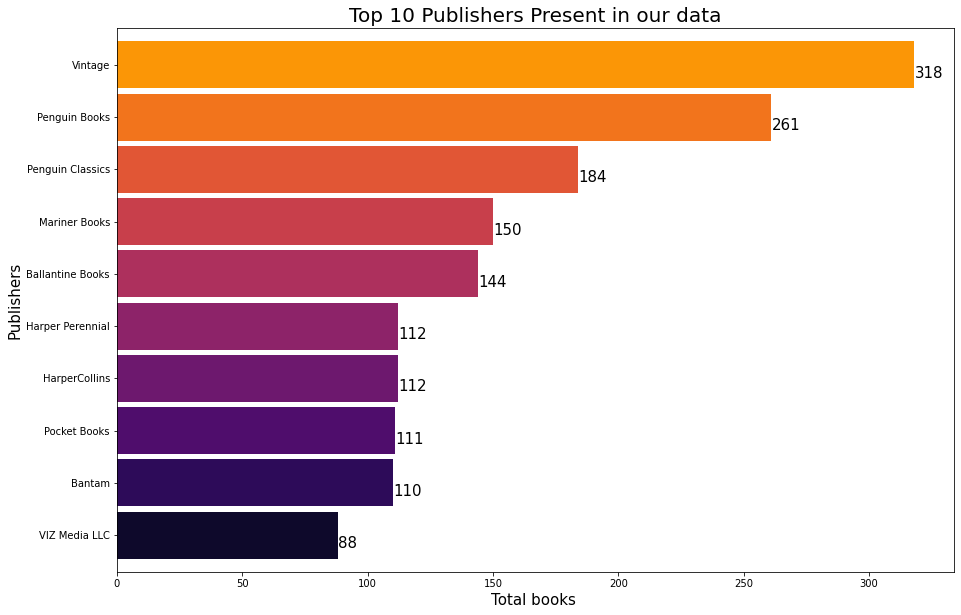

In [27]:
top_publishers = df.groupby('publisher')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('publisher')
plt.subplots(figsize=(15,10))
ax = top_publishers['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('inferno',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Publishers", fontsize=15)
ax.set_title("Top 10 Publishers Present in our data",fontsize=20,color='black')
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width()+.2, i.get_y()+.2,str(round(i.get_width())), fontsize=15,color='black')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Average rating')

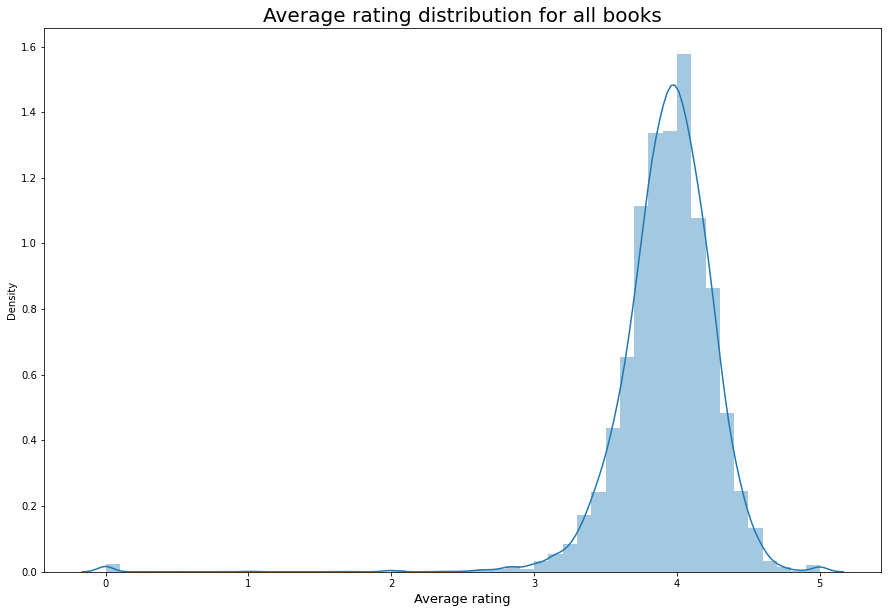

In [28]:
df.average_rating = df.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(df['average_rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

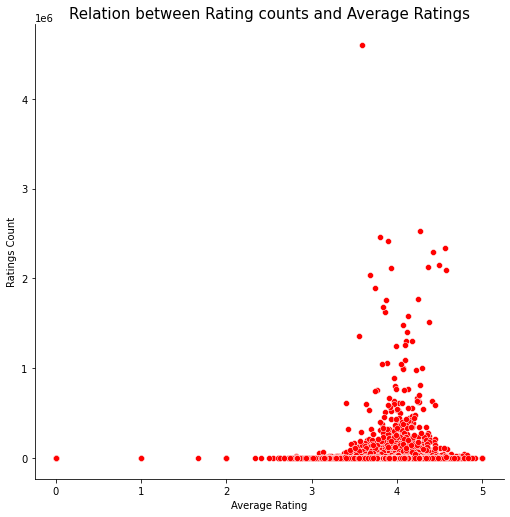

In [29]:
ax = sns.relplot(data=df, x="average_rating", y="ratings_count", color = 'red', sizes=(100, 200), height=7, marker='o')
plt.title("Relation between Rating counts and Average Ratings",fontsize = 15)
ax.set_axis_labels("Average Rating", "Ratings Count")

<Figure size 1080x720 with 0 Axes>

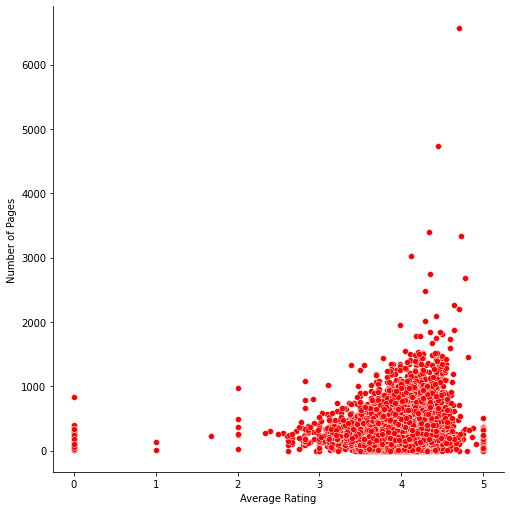

In [31]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="num_pages", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

<Figure size 1080x720 with 0 Axes>

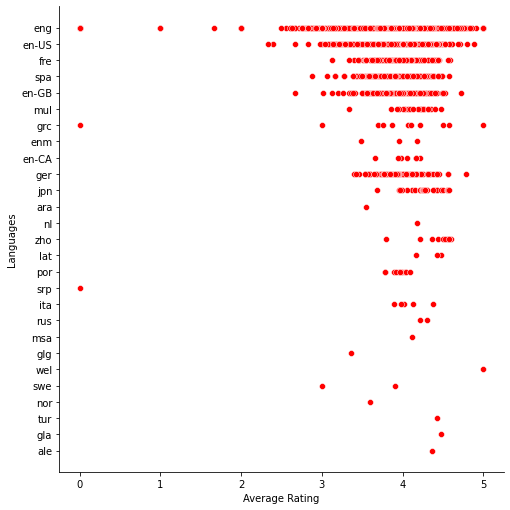

In [32]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="language_code", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Languages")

<Figure size 1080x720 with 0 Axes>

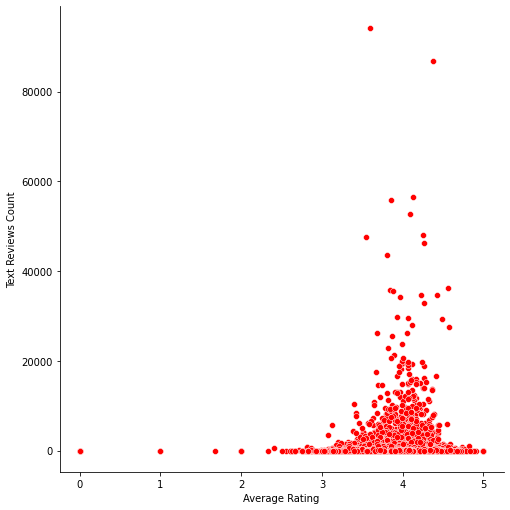

In [33]:
plt.figure(figsize=(15,10))
ax = sns.relplot(x="average_rating", y="text_reviews_count", data = df, color = 'red',sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Text Reviews Count")

In [39]:
df.loc[ (df['average_rating'] >= 0) & (df['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
df.loc[ (df['average_rating'] > 1) & (df['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
df.loc[ (df['average_rating'] > 2) & (df['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
df.loc[ (df['average_rating'] > 3) & (df['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
df.loc[ (df['average_rating'] > 4) & (df['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"
df.head()


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,between 4 and 5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic,between 4 and 5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,between 4 and 5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic,between 4 and 5


In [41]:
rating_df = pd.get_dummies(df['rating_between'])
rating_df.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [42]:
language_df = pd.get_dummies(df['language_code'])
language_df.head()

,ale,ara,en-CA,en-GB,en-US,eng,enm,fre,ger,gla,...,nl,nor,por,rus,spa,srp,swe,tur,wel,zho
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
features = pd.concat([rating_df, language_df, df['average_rating'], df['ratings_count']], axis=1)
features.head()

,between 0 and 1,between 1 and 2,between 2 and 3,between 3 and 4,between 4 and 5,ale,ara,en-CA,en-GB,en-US,...,por,rus,spa,srp,swe,tur,wel,zho,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


In [49]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [50]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [55]:
def BookRecommender(book_name):
    book_list_name = []
    book_id = df[df['title'] == book_name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list_name.append(df.loc[newid].title)
    return book_list_name

In [56]:
BookNames = BookRecommender('Harry Potter and the Half-Blood Prince (Harry Potter  #6)')
BookNames

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
 'The Fellowship of the Ring (The Lord of the Rings  #1)',
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)',
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)',
 'The Lightning Thief (Percy Jackson and the Olympians  #1)']